<a href="https://colab.research.google.com/github/ajanaferreira/bootcampdataanalytics/blob/main/Classificacao_regressao_janaina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importações necessarias
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as sp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

In [ ]:
#Carregando df
df = pd.read_csv('iris.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##1.a. Faça uma análise inicial sobre esse dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#verificando se há valores nulos
df.isnull().sum()

,0
Sepal_Length,0
Sepal_Width,0
Petal_Length,0
Petal_Width,0
Species,0


In [ ]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#verificando o tamanho do df
df.shape

(150, 5)

In [ ]:
#separando as colunas numericas
numericas = df.select_dtypes(include=['float64'])
numericas.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##1.b. Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes

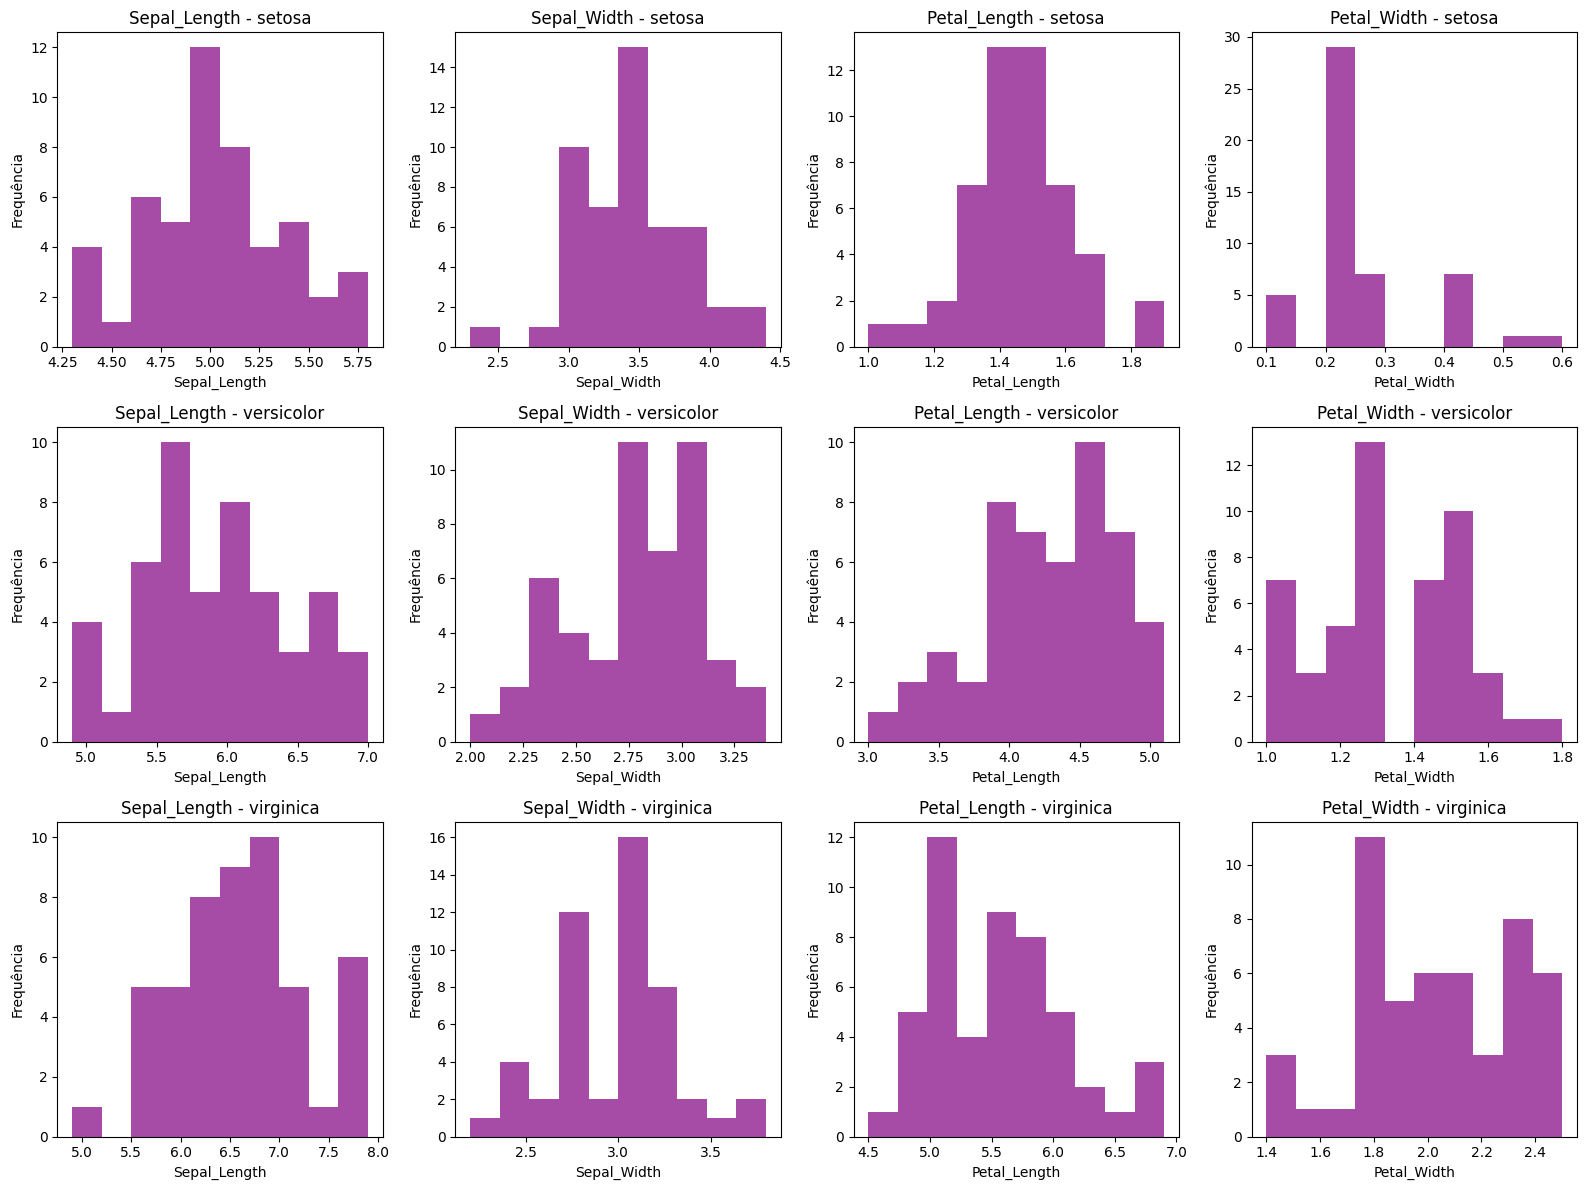

In [ ]:
# Lista com as colunas que deseja plotar os histogramas
columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

# Agrupando o DataFrame por espécie
species_grouped = df.groupby('Species')

# Calculando o número de espécies e o número de colunas
num_species = df['Species'].nunique()
num_columns = len(columns)

# Configurando os subplots: 'num_species' linhas e 'num_columns' colunas
fig, axes = plt.subplots(num_species, num_columns, figsize=(16, num_species * 4))

# Gerando histogramas
for i, (species, group) in enumerate(species_grouped):
    for j, column in enumerate(columns):
        axes[i, j].hist(group[column], bins=10, alpha=0.7, color='purple')
        axes[i, j].set_title(f'{column} - {species}')
        axes[i, j].set_xlabel(column)
        axes[i, j].set_ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()
plt.show()

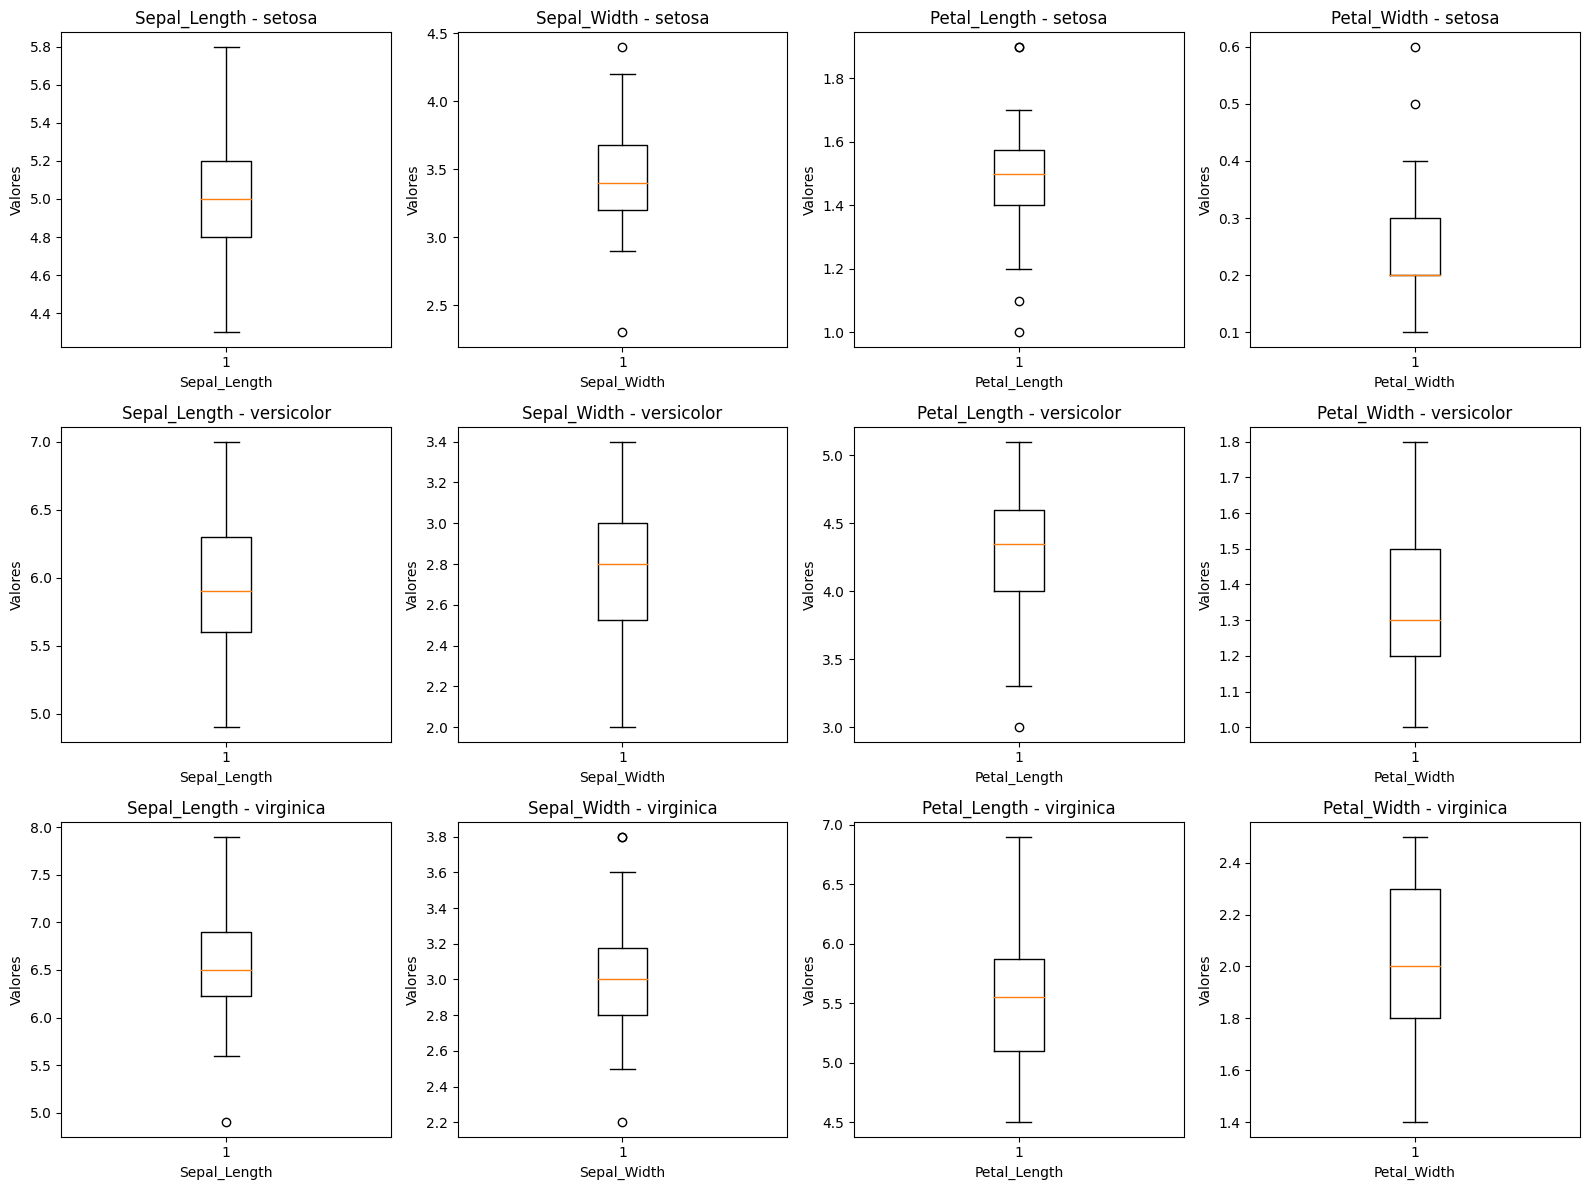

In [ ]:
# Configurando os subplots: 'num_species' linhas e 'num_columns' colunas
fig, axes = plt.subplots(num_species, num_columns, figsize=(16, num_species * 4))

# Gerando boxplots
for i, (species, group) in enumerate(species_grouped):
    for j, column in enumerate(columns):
        axes[i, j].boxplot(group[column])
        axes[i, j].set_title(f'{column} - {species}')
        axes[i, j].set_xlabel(column)
        axes[i, j].set_ylabel('Valores')

# Ajustar o layout
plt.tight_layout()
plt.show()

##1c. Somente olhando esses gráficos, é possível afirmar que uma ou mais propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) são suficientes para distinguir as espécies?

### Acredito que apenas de olhar não é possível distinguir as espécies. Por exemplo, sepal_widht - versicolor e virginica apresentam a mesma largura em determinado momento (3.00), assim como em sepal_lenght (7.00).

##1d. Aplique a regressão logística para avaliar o modelo de classificação.

In [ ]:
# Convertendo a coluna Species
le = LabelEncoder()
y = le.fit_transform(df['Species'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x = numericas
# Dividir os dados em treino e teste (80% treino, 20% teste)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Treinar o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=200)  # Ajustando o número máximo de iterações
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [ ]:
x_test.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [ ]:
x_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


##1e. Calcule a acurácia, precisão e recall.

In [ ]:
class_report = classification_report(y_test, y_pred, target_names=le.classes_)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Imprimir métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0


##1f. Plote a matriz de confusão com matplotlib ou seaborn.

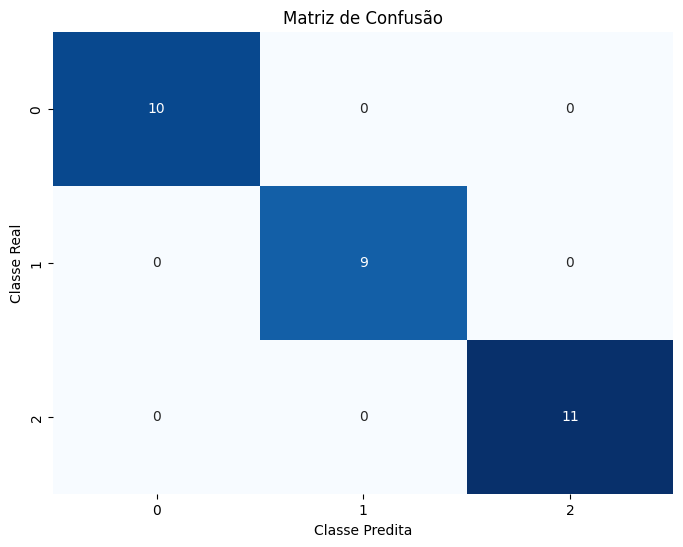

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()